# Title 

## Exploratory Data Analysis
---

In this notebook

### Table of content
---

### Import Packages 

In [30]:
#Import miscellaneous
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Import processing tools
import pandas as pd 
import numpy  as np

#Import Visualization tools
import seaborn           as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [31]:
#Read in data set
outbreak = pd.read_csv('../data/measles.csv')

In [32]:
outbreak.head()

,indicator,unit,time,regioncode,regionname,numvalue
0,Notification rate,N/1000000,1999-01-01,AT,Austria,0.250549
1,Notification rate,N/1000000,1999-01-01,DK,Denmark,0.188197
2,Notification rate,N/1000000,1999-01-01,EL,Greece,1.581724
3,Notification rate,N/1000000,1999-01-01,EU_EEA31,EU/EEA,0.822608
4,Notification rate,N/1000000,1999-01-01,FI,Finland,0.000000


In [34]:
outbreak.tail()

,indicator,unit,time,regioncode,regionname,numvalue
26814,Vaccination coverage second dose,%,2018-01-01,RO,Romania,81.0
26815,Vaccination coverage second dose,%,2018-01-01,SE,Sweden,95.0
26816,Vaccination coverage second dose,%,2018-01-01,SI,Slovenia,94.0
26817,Vaccination coverage second dose,%,2018-01-01,SK,Slovakia,97.0
26818,Vaccination coverage second dose,%,2018-01-01,UK,United Kingdom,88.0


In [38]:
outbreak['time'] = pd.to_datetime(outbreak['time'])

### Different indicators

In [39]:
outbreak['indicator'].unique()

array(['Notification rate ', 'Number of deaths', 'Reported cases',
       'Reported confirmed cases', 'Vaccination coverage first dose',
       'Vaccination coverage second dose'], dtype=object)

In [40]:
outbreak.loc[outbreak['indicator'] == 'Notification rate '].head()

,indicator,unit,time,regioncode,regionname,numvalue
0,Notification rate,N/1000000,1999-01-01,AT,Austria,0.250549
1,Notification rate,N/1000000,1999-01-01,DK,Denmark,0.188197
2,Notification rate,N/1000000,1999-01-01,EL,Greece,1.581724
3,Notification rate,N/1000000,1999-01-01,EU_EEA31,EU/EEA,0.822608
4,Notification rate,N/1000000,1999-01-01,FI,Finland,0.000000


In [41]:
outbreak['indicator'].value_counts()

Number of deaths                    6427
Reported cases                      6427
Reported confirmed cases            6427
Notification rate                   6427
Vaccination coverage first dose      620
Vaccination coverage second dose     491
Name: indicator, dtype: int64

In [42]:
#### Creating a data frame for each for the different indicator ???

# for indicator in outbreak['indicator'].unique():
#     pd.DataFrame(outbreak, index=outbreak.loc[outbreak['indicator'] == str(indicator)].index)

#### Different regions

In [43]:
outbreak['regionname'].value_counts().index

Index(['Netherlands', 'EU/EEA', 'Sweden', 'Norway', 'United Kingdom',
       'Denmark', 'Greece', 'Italy', 'Finland', 'Ireland', 'Portugal',
       'Austria', 'Germany', 'Malta', 'Spain', 'Luxembourg', 'Belgium',
       'Czech Republic', 'Romania', 'Poland', 'Slovenia', 'Bulgaria',
       'Estonia', 'Slovakia', 'Hungary', 'Lithuania', 'Iceland', 'Latvia',
       'Cyprus', 'France', 'Croatia'],
      dtype='object')

In [46]:
france = outbreak[outbreak['regionname'] == 'France']
france.dtypes

indicator             object
unit                  object
time          datetime64[ns]
regioncode            object
regionname            object
numvalue             float64
dtype: object

In [58]:
france['indicator'].unique()

array(['Notification rate ', 'Number of deaths', 'Reported cases',
       'Reported confirmed cases', 'Vaccination coverage first dose',
       'Vaccination coverage second dose'], dtype=object)

In [78]:
#Mask for indicators 

indicator = outbreak['indicator'] == 'Notification rate '
deaths = outbreak['indicator'] == 'Number of deaths'
reported = outbreak['indicator'] == 'Reported cases'
confirmed = outbreak['indicator'] == 'Reported confirmed cases'
vaccine_1 = outbreak['indicator'] == 'Vaccination coverage first dose'
vaccine_2 = outbreak['indicator'] == 'Vaccination coverage second dose'

In [61]:
france.loc[indicator].head()

,indicator,unit,time,regioncode,regionname,numvalue
1416,Notification rate,N/1000000,2006-01-01,FR,France,0.158154
1446,Notification rate,N/1000000,2006-02-01,FR,France,0.094892
1476,Notification rate,N/1000000,2006-03-01,FR,France,0.094892
1506,Notification rate,N/1000000,2006-04-01,FR,France,0.047446
1536,Notification rate,N/1000000,2006-05-01,FR,France,0.015815


In [63]:
france.loc[deaths].head()

,indicator,unit,time,regioncode,regionname,numvalue
7843,Number of deaths,N,2006-01-01,FR,France,0.0
7873,Number of deaths,N,2006-02-01,FR,France,0.0
7903,Number of deaths,N,2006-03-01,FR,France,0.0
7933,Number of deaths,N,2006-04-01,FR,France,0.0
7963,Number of deaths,N,2006-05-01,FR,France,NaN


In [65]:
france.loc[reported].head()

,indicator,unit,time,regioncode,regionname,numvalue
14270,Reported cases,N,2006-01-01,FR,France,10.0
14300,Reported cases,N,2006-02-01,FR,France,6.0
14330,Reported cases,N,2006-03-01,FR,France,6.0
14360,Reported cases,N,2006-04-01,FR,France,3.0
14390,Reported cases,N,2006-05-01,FR,France,1.0


In [80]:
france.loc[confirmed].head()

,indicator,unit,time,regioncode,regionname,numvalue
20697,Reported confirmed cases,N,2006-01-01,FR,France,3.0
20727,Reported confirmed cases,N,2006-02-01,FR,France,3.0
20757,Reported confirmed cases,N,2006-03-01,FR,France,3.0
20787,Reported confirmed cases,N,2006-04-01,FR,France,1.0
20817,Reported confirmed cases,N,2006-05-01,FR,France,1.0


In [67]:
france.loc[vaccine_1].head()

,indicator,unit,time,regioncode,regionname,numvalue
25720,Vaccination coverage first dose,%,1999-01-01,FR,France,83.0
25751,Vaccination coverage first dose,%,2000-01-01,FR,France,84.0
25782,Vaccination coverage first dose,%,2001-01-01,FR,France,85.0
25813,Vaccination coverage first dose,%,2002-01-01,FR,France,86.0
25844,Vaccination coverage first dose,%,2003-01-01,FR,France,87.0


In [68]:
france.loc[vaccine_2].head()

,indicator,unit,time,regioncode,regionname,numvalue
26571,Vaccination coverage second dose,%,2010-01-01,FR,France,61.0
26598,Vaccination coverage second dose,%,2011-01-01,FR,France,67.0
26625,Vaccination coverage second dose,%,2012-01-01,FR,France,72.0
26653,Vaccination coverage second dose,%,2013-01-01,FR,France,75.0
26682,Vaccination coverage second dose,%,2014-01-01,FR,France,77.0


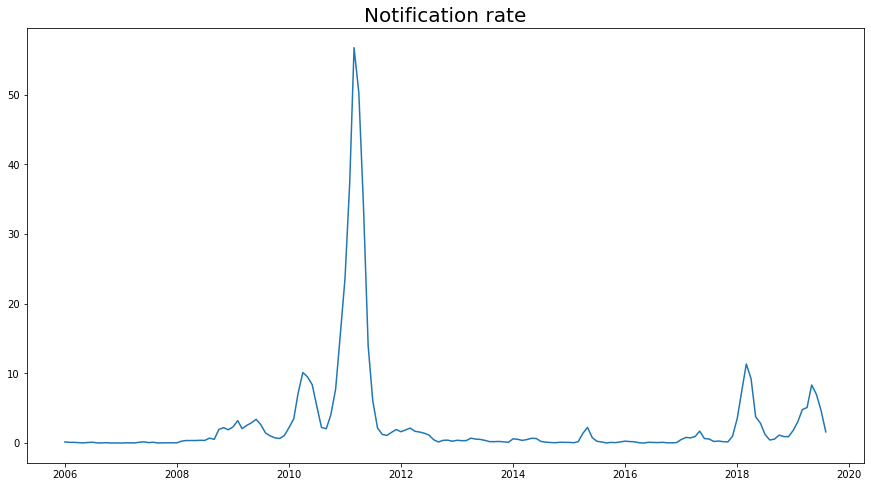

In [101]:
plt.figure(figsize=(15,8))
plt.plot(france.loc[indicator]['time'], france.loc[indicator]['numvalue'])
plt.title("Notification rate", fontsize= 20);

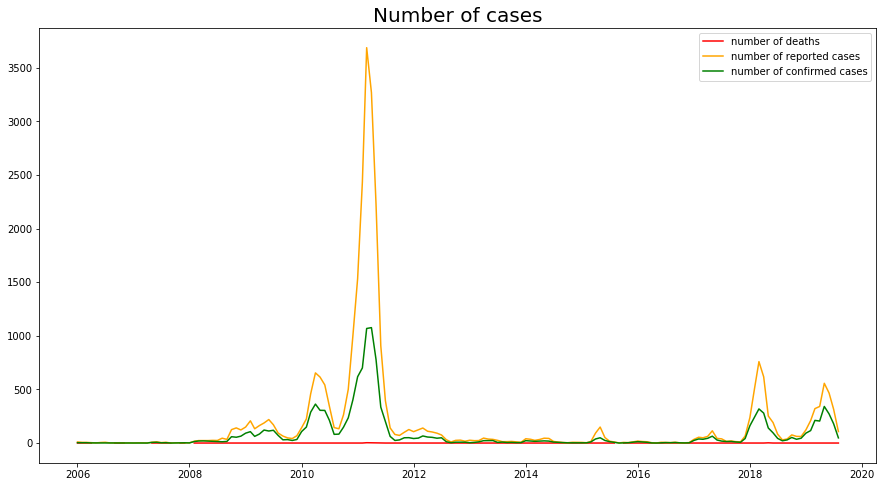

In [102]:
plt.figure(figsize=(15,8))
plt.plot(france.loc[deaths]['time'], france.loc[deaths]['numvalue'], label= 'number of deaths', color='red')
plt.plot(france.loc[reported]['time'], france.loc[reported]['numvalue'], label= 'number of reported cases', color='orange')
plt.plot(france.loc[confirmed]['time'], france.loc[confirmed]['numvalue'], label= 'number of confirmed cases', color='green')
plt.title("Number of cases", fontsize=20)
plt.legend();

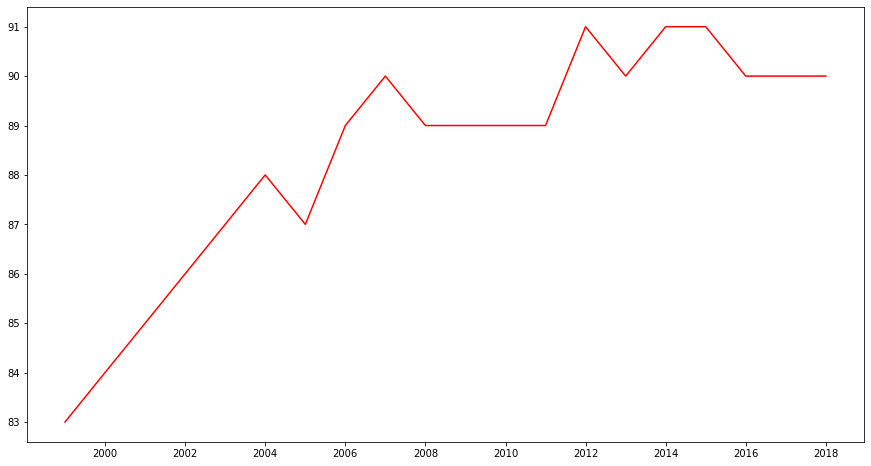

In [110]:
plt.figure(figsize=(15,8))
plt.plot(france.loc[vaccine_1]['time'], france.loc[vaccine_1]['numvalue'], label= 'First Vaccination in %', color='red')
# plt.plot(france.loc[vaccine_2]['time'], france.loc[vaccine_2]['numvalue'], label= 'Second Vaccination in %', color='green');

In [112]:
france.loc[vaccine_1]

,indicator,unit,time,regioncode,regionname,numvalue
25720,Vaccination coverage first dose,%,1999-01-01,FR,France,83.0
25751,Vaccination coverage first dose,%,2000-01-01,FR,France,84.0
25782,Vaccination coverage first dose,%,2001-01-01,FR,France,85.0
25813,Vaccination coverage first dose,%,2002-01-01,FR,France,86.0
25844,Vaccination coverage first dose,%,2003-01-01,FR,France,87.0
25875,Vaccination coverage first dose,%,2004-01-01,FR,France,88.0
25906,Vaccination coverage first dose,%,2005-01-01,FR,France,87.0
25937,Vaccination coverage first dose,%,2006-01-01,FR,France,89.0
25968,Vaccination coverage first dose,%,2007-01-01,FR,France,90.0
25999,Vaccination coverage first dose,%,2008-01-01,FR,France,89.0


### Austria

In [119]:
austria = outbreak[outbreak['regionname'] == "Austria"]

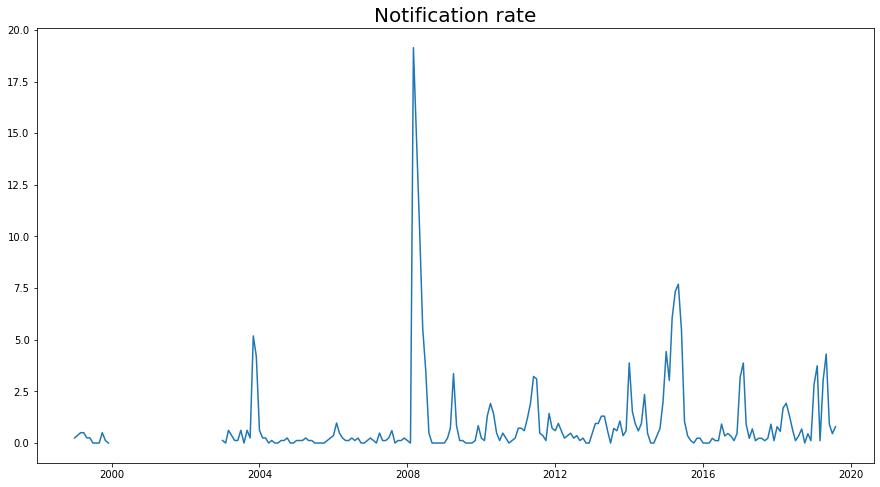

In [121]:
plt.figure(figsize=(15,8))
plt.plot(austria.loc[indicator]['time'], austria.loc[indicator]['numvalue'])
plt.title("Notification rate", fontsize= 20);

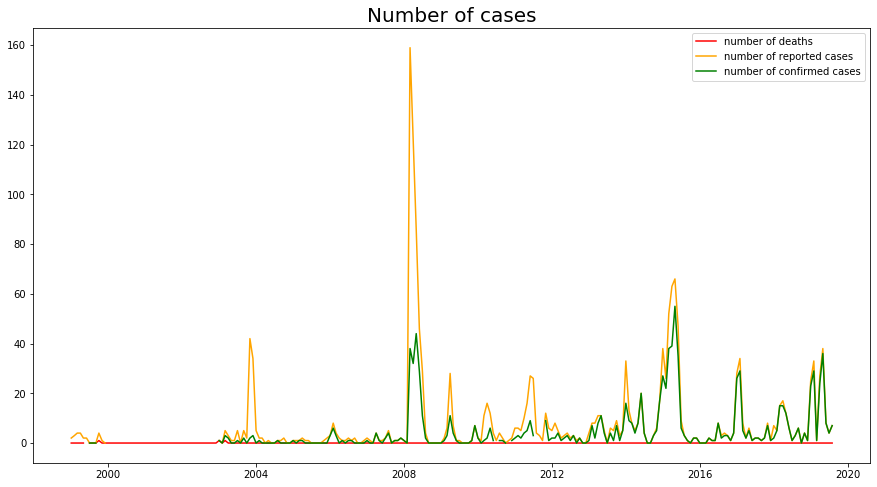

In [122]:
plt.figure(figsize=(15,8))
plt.plot(austria.loc[deaths]['time'], austria.loc[deaths]['numvalue'], label= 'number of deaths', color='red')
plt.plot(austria.loc[reported]['time'], austria.loc[reported]['numvalue'], label= 'number of reported cases', color='orange')
plt.plot(austria.loc[confirmed]['time'], austria.loc[confirmed]['numvalue'], label= 'number of confirmed cases', color='green')
plt.title("Number of cases", fontsize=20)
plt.legend();

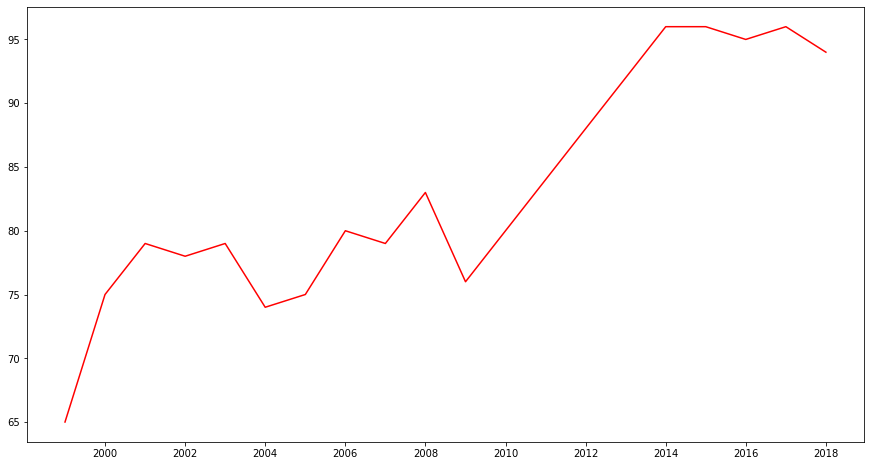

In [125]:
plt.figure(figsize=(15,8))
plt.plot(austria.loc[vaccine_1]['time'], austria.loc[vaccine_1]['numvalue'], label= 'First Vaccination in %', color='red')
# plt.plot(austria.loc[vaccine_2]['time'], austria.loc[vaccine_2]['numvalue'], label= 'Second Vaccination in %', color='green');